## **Early Stage Diabetes Risk Prediction**

![image](diabetes.jpeg)

Image credit: https://dev.to/heyfunmi/diabetes-prediction-using-machine-learning-3kbc

#### **Table of Contents**

1. Executive summary
2. Data source and description
3. Setup
4. Data exploration and preprocessing
5. Machine learning model
6. Results

> #### **Executive Summary**

This project is a beginner-level of implementation of machine learning algorithm, *Logistic Regression* to predict the risk of diabetes. The project starts with data encoding as all columns of the data except the 'Age' column, are bianry columns, i.e., they have only two distinct values. We then move to explore the data and check the correlation between the different features and the risk of diabetes. To finish, we implement the Logistic Regression to classify a given patient as at risk of diabetes or not. The model secured an accuracy score of 92.30%.

> #### **Data Source and Description**

*Source:* Kaggle - https://www.kaggle.com/datasets/ishandutta/early-stage-diabetes-risk-prediction-dataset

**Features:-**

- Age
- Gender: Male/Female
- Polyuria: condition where patient produces large amount of urine. Yes/No
- Polydipsia: Excessive thirst or abnormal urge to drink fluids all the time. Yes/No
- sudden weight loss: Yes/Mo
- weakness: Yes/No
- Polyphagia: Excessive hunger or appetite. Yes/No
- Genital thrush :Yes/No
- Itching: Yes/No
- Irritability: Yes/No
- delayed healing: Yes/No
- partial paresis: Yes/No
- muscle stiffness: Yes/No
- Alopecia: Hair loss from part of the bodies where hair grows. Yes/No
- Obesity: Excessive fat accumulation. Yes/No
- class: Diabetes prediction. Positive/Negative

>#### **Setup**

In [99]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

>#### **Data Exploration and Preprocessing**

In [100]:
df = pd.read_csv('diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [101]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [103]:
df.shape

(520, 17)

In [104]:
df['class'].value_counts()

class
Positive    320
Negative    200
Name: count, dtype: int64

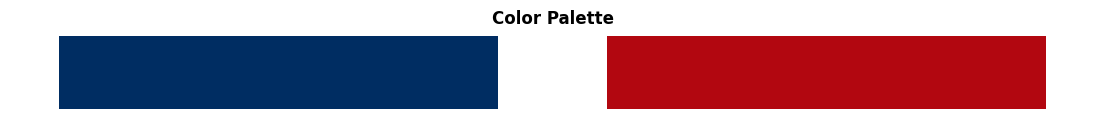

In [105]:
color_palette = ['#002D62', '#b20710']

# display color palette
fig, ax = plt.subplots(figsize=(14,1))
ax.axis('off')

for i, color in enumerate(color_palette):
    ax.bar(i, 1, color=color)

plt.title('Color Palette', fontweight='bold')
plt.show()

In [106]:
diabetes_class = df.groupby(['class']).size().reset_index(name='count')
diabetes_class

,class,count
0,Negative,200
1,Positive,320


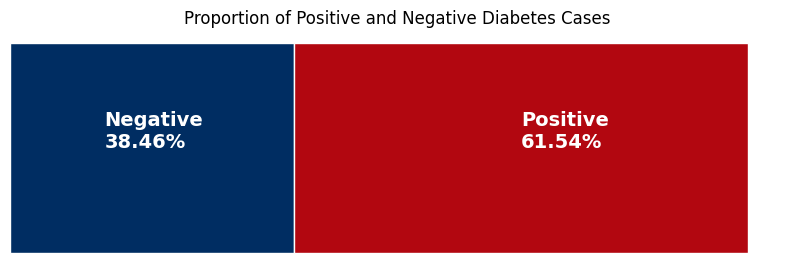

In [107]:
colors = [color_palette[0], color_palette[1]]
class_percentage = round((diabetes_class['count']/diabetes_class['count'].sum())*100, 2)
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')

ax.barh([''], [class_percentage[0]], color=colors[0], edgecolor='white', label='Negative')
ax.barh([''], [class_percentage[1]], color=colors[1], left=[class_percentage[0]], edgecolor='white', label='Positive')

ax.text(class_percentage[0]/3, 0, f'Negative\n{class_percentage[0]}%', fontsize=14, color='white', fontweight='bold')
ax.text(class_percentage[0] + class_percentage[1]/2, 0, f'Positive\n{class_percentage[1]}%', fontsize=14, color='white', fontweight='bold')

plt.title('Proportion of Positive and Negative Diabetes Cases')
plt.show()

In [108]:
count_by_gender = df.groupby(['Gender','class']).size().reset_index(name='count')
count_by_gender

,Gender,class,count
0,Female,Negative,19
1,Female,Positive,173
2,Male,Negative,181
3,Male,Positive,147


In [109]:
count_by_gender['percentage'] = round(count_by_gender['count']/(count_by_gender['count'].sum())*100, 2)

count_by_gender

,Gender,class,count,percentage
0,Female,Negative,19,3.65
1,Female,Positive,173,33.27
2,Male,Negative,181,34.81
3,Male,Positive,147,28.27


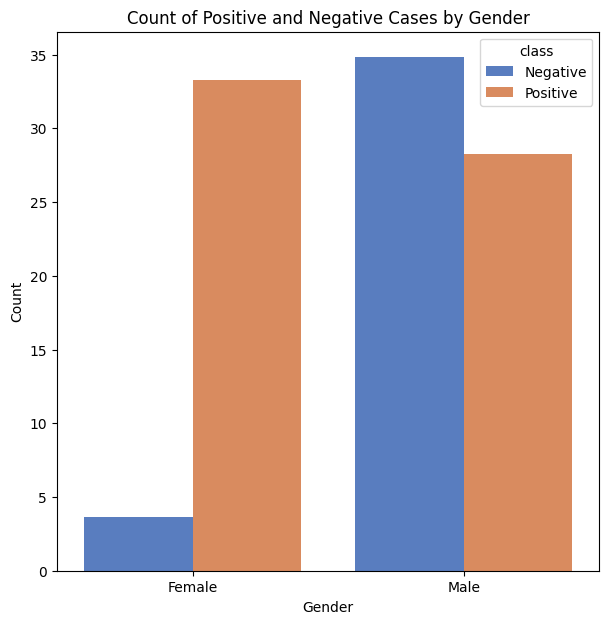

In [110]:
plt.figure(figsize=(7, 7))

# Plot the bar graph using seaborn
sns.barplot(x='Gender', y='percentage', hue='class', data=count_by_gender, palette='muted')

# Set the plot title and labels
plt.title('Count of Positive and Negative Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

In [111]:
# Apply binary encoding to the data to transform it to numerical values
for col in df.columns:
    if col == 'Age':
        continue
    df[col] = LabelEncoder().fit_transform(df[col])

In [112]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [113]:
# Check the correlation of each column with the class column
correlation_values = {}

for col in df.columns.difference(['class']):
    correlation_values[col] = df[col].corr(df['class'])

cor_vals = pd.Series(correlation_values)
cor_vals

Age                   0.108679
Alopecia             -0.267512
Gender               -0.449233
Genital thrush        0.110288
Irritability          0.299467
Itching              -0.013384
Obesity               0.072173
Polydipsia            0.648734
Polyphagia            0.342504
Polyuria              0.665922
delayed healing       0.046980
muscle stiffness      0.122474
partial paresis       0.432288
sudden weight loss    0.436568
visual blurring       0.251300
weakness              0.243275
dtype: float64

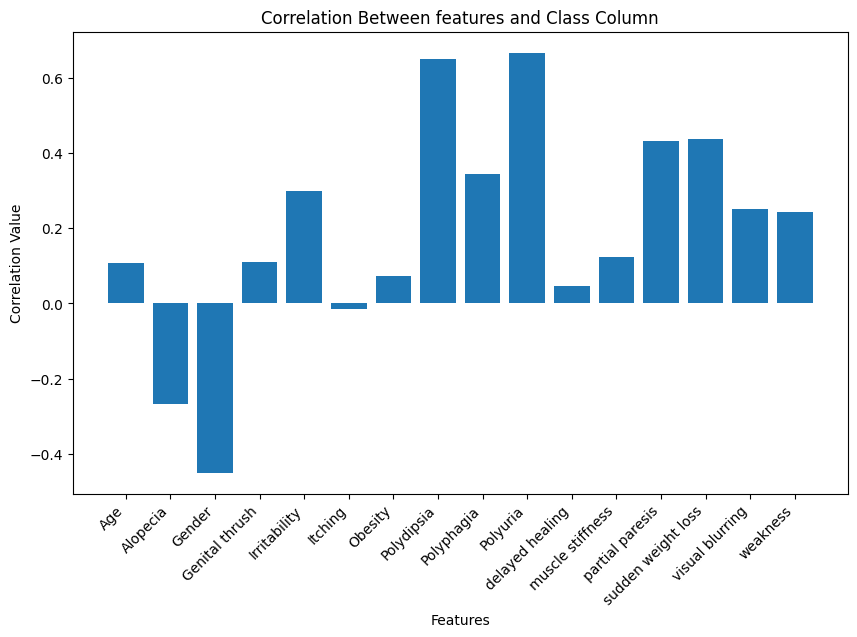

In [114]:
# Plot a bar graph displaying the correlation
plt.figure(figsize=(10,6))
plt.bar(cor_vals.index, cor_vals.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Correlation Value')
plt.title('Correlation Between features and Class Column')

plt.show()

>#### **Machine Learning Model**

In [115]:
# Split data into training and test sets
X = df[df.columns.difference(['class'])]
y = df['class']

# scale the features' data so that it has a mean 0 and sdv 1

X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
X.head()

,Age,Alopecia,Gender,Genital thrush,Irritability,Itching,Obesity,Polydipsia,Polyphagia,Polyuria,delayed healing,muscle stiffness,partial paresis,sudden weight loss,visual blurring,weakness
0,-0.661367,1.380227,0.765092,-0.535844,-0.565506,1.027295,2.215647,1.109847,-0.915126,-0.992337,1.084312,1.290994,-0.869918,-0.846269,-0.901025,0.839594
1,0.821362,1.380227,0.765092,-0.535844,-0.565506,-0.973430,-0.451335,-0.901025,-0.915126,-0.992337,-0.922244,-0.774597,1.149534,-0.846269,1.109847,0.839594
2,-0.578993,1.380227,0.765092,-0.535844,-0.565506,1.027295,-0.451335,-0.901025,1.092746,1.007722,1.084312,1.290994,-0.869918,-0.846269,-0.901025,0.839594
3,-0.249498,-0.724518,0.765092,1.866215,-0.565506,1.027295,-0.451335,-0.901025,1.092746,-0.992337,1.084312,-0.774597,-0.869918,1.181657,-0.901025,0.839594
4,0.986110,1.380227,0.765092,-0.535844,1.768328,1.027295,2.215647,1.109847,1.092746,1.007722,1.084312,1.290994,1.149534,1.181657,1.109847,0.839594


In [117]:
# Train the model
lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

LogisticRegression()

In [118]:
# Predict y values on test data
predicted_y = lr_model.predict(X_test)

In [119]:
# Check accuracy of the model
accuracy = accuracy_score(predicted_y, y_test)
print("Accuracy score: {:.2f}%".format(accuracy*100))

Accuracy score: 92.31%


>#### **Results**

* In the dataset used, 61.54% of the patients are diabetes-positive while 38.46% are negative.
* Female patients in the negative class (i.e., who have no diabetes) represent 3.65% of the whole data and male patients represent 34.81% while female represent 33.27% of the positive class (i.e., patients with diabetes) and male represent 28.27% of this class.
* Polydipsia and Polyuria are revealed to have the highest positive correlation with the 'class' column, and alopecia and gender have important negative correlation coefficients with the 'class' column.
* The logistic regression implemented using scikit learn library, has an accuracy of 92.31%